In [137]:
import numpy as np 
import pandas as pd 
import os 
import cv2 as cv
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
from imblearn.under_sampling import RandomUnderSampler

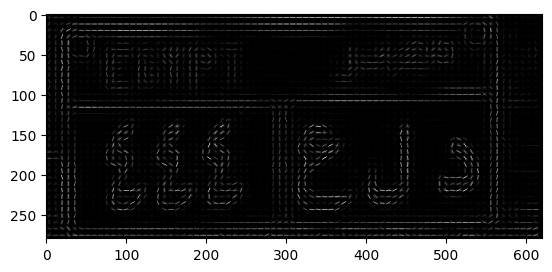

In [139]:
image_path = r"C:\Users\Twins\Documents\ShareX\Screenshots\2023-12\brave_T9ycxB9MYu.png"
img = cv.imread(image_path)
# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

describtor,Himg= hog(gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1),visualize=True)
plt.imshow(Himg,cmap='gray')

In [140]:
columns = ["images" , "label" ]
data = []
labels = []

In [141]:
dataset = 'dataset'
paths = os.listdir(dataset)
print(paths)
for path in paths:
    images = os.listdir('dataset/'+path)
    for img_path in images:
        img = cv.imread('dataset/'+path+"/"+img_path)
        img = cv.resize(img,(32,64))
        # Convert the image to grayscale
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        describtor= hog(gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1))
        data.append((describtor).flatten())
        labels.append(path)
  

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'aen', 'alf', "ba'", 'dal', "fa'", 'gem', "ha'", 'lam', 'Mem', 'noon', 'qaf', "ra'", 'sad', 'seen', "ta'", 'waw', "ya'"]


In [142]:
df= pd.DataFrame(data)
df["label"] = labels

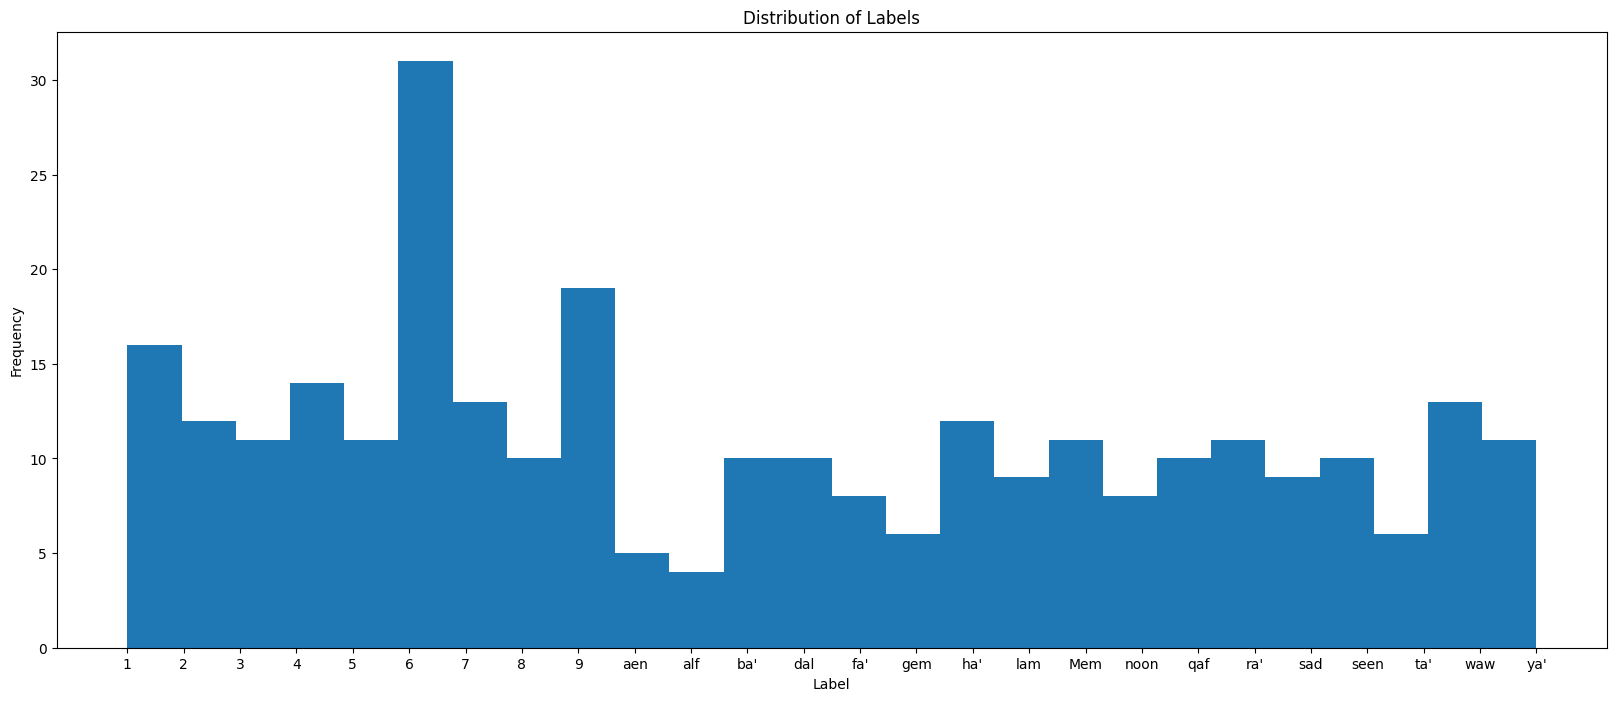

In [143]:
plt.figure(figsize = (20,8))
plt.hist(df["label"],bins=26,)
plt.xticks()
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

In [144]:
df.info

<bound method DataFrame.info of             0         1         2         3         4         5         6  \
0    0.048595  0.499409  0.499409  0.499409  0.499409  0.000000  0.000000   
1    0.036605  0.464983  0.520895  0.520895  0.487520  0.040532  0.000000   
2    0.085196  0.134763  0.668628  0.668628  0.275133  0.059549  0.025266   
3    0.153755  0.060440  0.588231  0.588231  0.529314  0.013993  0.000000   
4    0.053142  0.411440  0.525323  0.525323  0.525323  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
285  0.315295  0.081201  0.412002  0.412002  0.412002  0.412002  0.412002   
286  0.418915  0.247537  0.418915  0.247537  0.418915  0.000000  0.418915   
287  0.442069  0.442069  0.389356  0.000000  0.442069  0.123125  0.442069   
288  0.403413  0.077900  0.246342  0.077900  0.403413  0.343868  0.403413   
289  0.374020  0.295766  0.374020  0.314717  0.374020  0.374020  0.374020   

            7         8         9  ...     

In [145]:
df = df.dropna(axis=1)

In [146]:
df.info

<bound method DataFrame.info of             0         1         2         3         4         5         6  \
0    0.048595  0.499409  0.499409  0.499409  0.499409  0.000000  0.000000   
1    0.036605  0.464983  0.520895  0.520895  0.487520  0.040532  0.000000   
2    0.085196  0.134763  0.668628  0.668628  0.275133  0.059549  0.025266   
3    0.153755  0.060440  0.588231  0.588231  0.529314  0.013993  0.000000   
4    0.053142  0.411440  0.525323  0.525323  0.525323  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
285  0.315295  0.081201  0.412002  0.412002  0.412002  0.412002  0.412002   
286  0.418915  0.247537  0.418915  0.247537  0.418915  0.000000  0.418915   
287  0.442069  0.442069  0.389356  0.000000  0.442069  0.123125  0.442069   
288  0.403413  0.077900  0.246342  0.077900  0.403413  0.343868  0.403413   
289  0.374020  0.295766  0.374020  0.314717  0.374020  0.374020  0.374020   

            7         8         9  ...     

In [147]:
X = df.drop(columns='label')
y= df['label']

In [148]:
under_sampler = RandomUnderSampler(random_state=42)
print("Before:",X.shape , y.shape)
X,y  = under_sampler.fit_resample(X,y)
print("After:",X.shape , y.shape)

Before: (290, 288) (290,)
After: (104, 288) (104,)


In [149]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X,y,test_size=0.1,random_state=42
# )

In [150]:
model = LogisticRegression(max_iter=1000, n_jobs=-1)

In [151]:
model.fit(X,y)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [152]:
print(accuracy_score(y_train,model.predict(X_train)))

1.0


In [153]:
model.score(X_test,y_test)

1.0

In [158]:
data = []
dataset = 'test'
paths = os.listdir(dataset)
print(paths)
for path in paths:
        img = cv.imread('test/'+path)
        img = cv.resize(img,(32,64))
        # Convert the image to grayscale
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        describtor= hog(gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1))
        data.append((describtor).flatten())

df_test = pd.DataFrame(data)
df_test = df_test.dropna(axis=1)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg']


In [159]:
print(model.predict(df_test))

["fa'" "ra'" 'seen' '6' '6' '6']
